## **01 读取数据**

In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["font.sans-serif"] = ["SimHei"] # 设置显示中文字体 宋体
plt.rcParams["axes.unicode_minus"] = False #字体更改后，会导致坐标轴中的部分字符无法正常显示，此时需要设置正常显示负号

In [187]:
data = pd.read_excel('./原始数据/附件1.xlsx')

In [188]:
data.columns

Index(['序号', '年龄', '性别', '籍贯', '民族', '身高', '体重', '文化程度', '婚姻状况', '家庭人均月收入',
       '近期是否出现意外事件', '是否有家庭成员或亲近朋友意外', '意外事件中是否目睹有人重伤',
       '意外事件及救援过程中，您是否接触或见过尸体', '您是否曾因为灾难现场的景象', '既往是否有精神病史', '近一月内是否使用药物',
       '是否吸烟（包括以前）', '吸烟状态', '是否饮酒', 'ASD分离', 'ASD再体验', 'ASD回避', 'ASD警觉',
       'ASD总分', 'ASD性质', 'PCL总分', '心理韧性', 'BMI', '遗传史'],
      dtype='object')

## 02 数据处理与特征工程

### 2.1 缺失值及异常值处理

In [189]:
# 缺失值查看
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 903 entries, 0 to 902
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   序号                     903 non-null    object 
 1   年龄                     903 non-null    int64  
 2   性别                     903 non-null    int64  
 3   籍贯                     903 non-null    object 
 4   民族                     903 non-null    object 
 5   身高                     903 non-null    int64  
 6   体重                     903 non-null    int64  
 7   文化程度                   903 non-null    int64  
 8   婚姻状况                   903 non-null    int64  
 9   家庭人均月收入                903 non-null    int64  
 10  近期是否出现意外事件             903 non-null    int64  
 11  是否有家庭成员或亲近朋友意外         903 non-null    int64  
 12  意外事件中是否目睹有人重伤          903 non-null    int64  
 13  意外事件及救援过程中，您是否接触或见过尸体  903 non-null    int64  
 14  您是否曾因为灾难现场的景象          903 non-null    int64  
 15  既往是否有精

数据中没有缺失值

In [190]:
# 剔除异常值  剔除婚姻状况为其他的样本，共有 4 例
data=data[(data['婚姻状况']!=3)]
data.shape

(899, 30)

### 2.2 因变量变换

1、先查看因变量的分布情况

Text(0, 0.5, '频数统计')

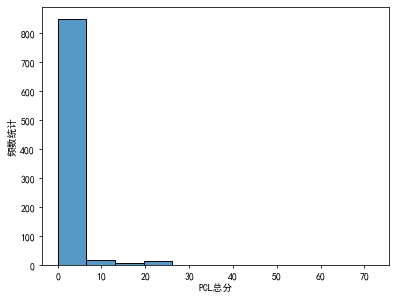

In [191]:
# 先查看因变量的分布情况
plt.figure(dpi=70)  # , figsize=(10, 8)
PCL = sns.histplot(kde=False,data=data['PCL总分'])
PCL.set_xlabel("PCL总分")
PCL.set_ylabel("频数统计")
# plt.savefig(r'./output/figure/PCL总分频数统计.png')

根据上图可以发现，我们需要对PCL值进行一定的处理

PCL_0
0    716
1    183
Name: count, dtype: int64
PCL_0的比例: 
0.203559510567297
PCL_3
0    808
1     91
Name: count, dtype: int64
PCL_3的比例: 
0.10122358175750834


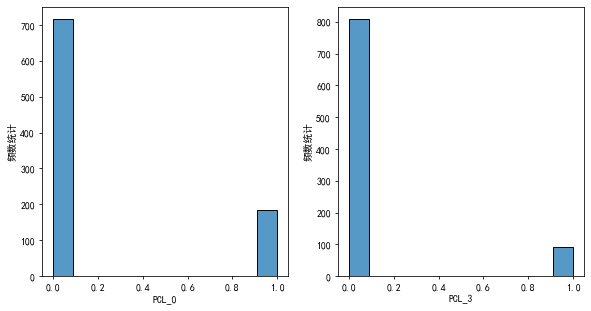

In [192]:
# PCL_0：按照是否为0进行划分
data['PCL_0'] = (data['PCL总分'] != 0).astype(int)  # 如果 PCL总分 不为 0，则为 1，否则为 0
# PCL_3：按照是否属于{0，1，2}进行划分
data['PCL_3'] = (~data['PCL总分'].isin([0, 1, 2])).astype(int)  # 如果 PCL总分 不在 {0, 1, 2} 中，则为 1，否则为 0

# 处理之后的因变量分布图
plt.figure(dpi=70, figsize=(10, 5))  # 
plt.subplot(1, 2, 1)
PCL_0 = sns.histplot(kde=False,data=data['PCL_0'])
# sns.barplot()
PCL_0.set_xlabel("PCL_0")  # 0-72
PCL_0.set_ylabel("频数统计")
plt.subplot(1, 2, 2)
PCL_3 = sns.histplot(kde=False,data=data['PCL_3'])
PCL_3.set_xlabel("PCL_3")  # 0-72
PCL_3.set_ylabel("频数统计")
# plt.savefig(r'C:\Users\TCP\Desktop\案例分析大赛\2024案例大赛-企业选题B\image\chapter04\PCL特征变换后频数统计图.png')

# 具体频数统计
print(data['PCL_0'].value_counts())
print("PCL_0的比例: ")
print(183/(183+716))
print(data['PCL_3'].value_counts())
print("PCL_3的比例: ")
print(91 / (91 + 808))

归属于不平衡数据的分类问题，可以考虑使用Smote等方法

### 2.3 特征提取（省份、民族）

Text(0.5, 0, '民族')

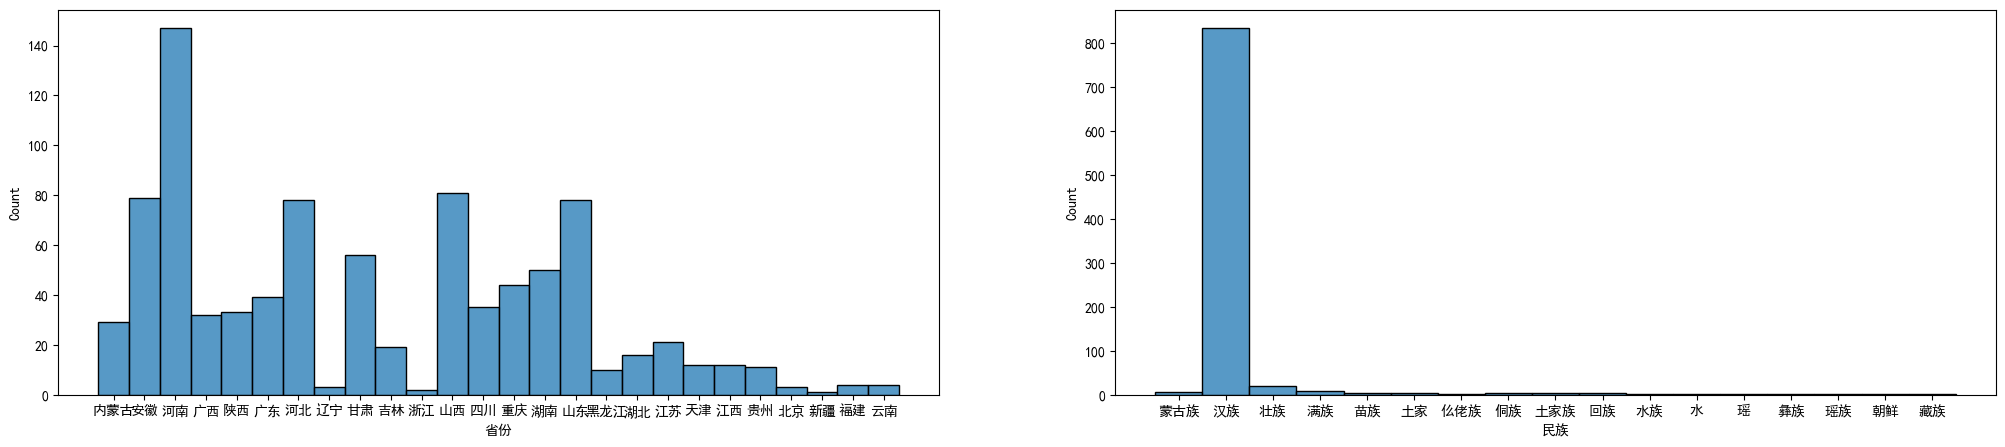

In [193]:
# 从籍贯中切分出省市
data[['省份','城市']] = data['籍贯'].str.split('-', expand = True)
data.drop(axis = 1, columns = '籍贯', inplace = True)
# 处理之后的变量分布图
plt.figure(dpi=100, figsize=(25, 5),)  #  figsize=(10, 5)
plt.subplot(1, 2, 1)
PCL_0 = sns.histplot(kde=False,data=data['省份'])
PCL_0.set_xlabel("省份")  # 0-72
plt.subplot(1, 2, 2)
PCL_3 = sns.histplot(kde=False,data=data['民族'])
PCL_3.set_xlabel("民族")  # 0-72
# PCL_3.set_xticklabels(rotation = 45) # 放大横轴坐标并逆时针旋转45°

In [194]:
# 批量转换为类别变量
# for col in feature_names:  dataset[col] = dataset[col].astype('category',copy=False)

对于省份的处理：

（1）就按省份来，不动  

（2）按照：东部、中部、西部 或 东部 西部/ 南部 北部  

（3）按海拔/降水量/是否发达城市

In [208]:
# 使用 Pandas 的 Categorical 类型自动编码
data['省份N'] = data['省份'].astype('category').cat.codes
# 判断是否为少数民族
data['是否少数民族'] = (data['民族'] != '汉族').astype(int)

## 将省份映射为地区
# 定义地区划分
region_map = {
    '东部': ['北京', '天津', '河北', '山东', '江苏', '上海', '浙江', '福建', '广东', '海南', '香港', '澳门', '台湾'],
    '中部': ['河南', '湖北', '湖南', '安徽', '江西', '山西'],
    '西部': ['四川', '云南', '贵州', '西藏', '重庆', '陕西', '甘肃', '青海', '新疆', '宁夏', '内蒙古', '广西'],
    '东北': ['黑龙江', '吉林', '辽宁']
}

# 将地区划分转换为字典，方便映射
region_dict = {province: code for code, provinces in enumerate(region_map.values(), start=1) for province in provinces}
# 使用 map 方法进行向量化编码
data['所属地区'] = data['省份'].map(region_dict)
# 如果有省份不在映射字典中，可以填充为 NaN 或其他默认值
data['所属地区'] = data['所属地区'].fillna(-1).astype(int)  # 假设未知省份编码为 -1

# 使用 Pandas 的向量化操作创建新列
data['是否东部'] = (data['所属地区'] == 1).astype(int)
data['是否中部'] = (data['所属地区'] == 2).astype(int)
data['是否西部'] = (data['所属地区'] == 3).astype(int)
data['是否东北'] = (data['所属地区'] == 4).astype(int)

## 将直辖市的区改为直辖市
dic = ['北京', '上海', '天津', '重庆']
data.reset_index(inplace=True, drop=True)
for i in range(data.shape[0]):
    for j in range(len(dic)):
        if data['省份'].iloc[i] == dic[j]:
            data['城市'].iloc[i] = dic[j]
            break

## 按照城市等级转换为一线、二线、三线城市
# 城市等级划分字典
city_tier = {
    '一线城市': ['北京', '上海', '广州', '深圳', '成都', '重庆', '杭州', '武汉', '苏州', '西安', '南京', '长沙', '天津', '郑州', '东莞', '青岛', '昆明', '宁波', '合肥'],
    '二线城市': ['沈阳', '无锡', '福州', '厦门', '南昌', '大连', '哈尔滨', '长春', '贵阳', '温州', '石家庄', '泉州', '南宁', '金华', '常州', '珠海', '徐州', '嘉兴', '南通', '中山', '惠州', '太原', '盐城', '兰州', '海口', '绍兴', '烟台', '保定'],
    '三线城市': ['唐山', '秦皇岛', '包头', '丹东', '锦州', '吉林', '牡丹江', '扬州', '蚌埠', '安庆', '泉州', '九江', '赣州', '烟台', '济宁', '洛阳', '平顶山', '宜昌', '襄阳', '岳阳', '常德', '韶关', '湛江', '惠州', '桂林', '北海', '三亚', '泸州', '南充', '遵义', '大理']
}

# 将城市等级展开为字典
city_tier_dict = {city: tier for tier, cities in city_tier.items() for city in cities}
# 映射城市等级
data['城市等级'] = data['城市'].map(city_tier_dict).fillna('其他')  # 未列出的城市标记为“其他”
city_tier_map = { '一线城市': 1, '二线城市': 2, '三线城市': 3, '其他': 4 }
# 使用 map 方法进行映射
data['城市等级数'] = data['城市等级'].map(city_tier_map)
# 使用 Pandas 的向量化操作创建新列
data['是否一线城市'] = (data['城市等级数'] == 1).astype(int)
data['是否二线城市'] = (data['城市等级数'] == 2).astype(int)
data['是否三线城市'] = (data['城市等级数'] == 3).astype(int)
data['非一二三城市'] = (data['城市等级数'] == 4).astype(int)
data

,序号,年龄,性别,民族,身高,体重,文化程度,婚姻状况,家庭人均月收入,近期是否出现意外事件,...,城市等级,城市等级数,是否东部,是否中部,是否西部,是否东北,是否一线城市,是否二线城市,是否三线城市,非一二三城市
0,A1,23,1,蒙古族,174,72,3,1,1,1,...,其他,4,0,0,1,0,0,0,0,1
1,A2,21,1,汉族,170,79,2,1,4,1,...,其他,4,0,1,0,0,0,0,0,1
2,A3,23,1,汉族,170,65,1,1,2,2,...,其他,4,0,1,0,0,0,0,0,1
3,A4,32,1,汉族,175,68,2,2,1,1,...,其他,4,0,1,0,0,0,0,0,1
4,A5,23,1,汉族,170,60,1,1,1,1,...,其他,4,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
894,A899,21,1,汉族,178,89,1,1,2,1,...,其他,4,0,1,0,0,0,0,0,1
895,A900,36,1,汉族,175,70,1,2,2,1,...,其他,4,1,0,0,0,0,0,0,1
896,A901,25,1,汉族,175,69,1,1,3,1,...,其他,4,1,0,0,0,0,0,0,1
897,A902,30,1,汉族,176,75,1,2,4,1,...,二线城市,2,0,0,0,1,0,1,0,0


In [209]:
# data[data["省份"].isin(["北京", "上海", "天津", "重庆"])]

Text(0.5, 0, '城市等级')

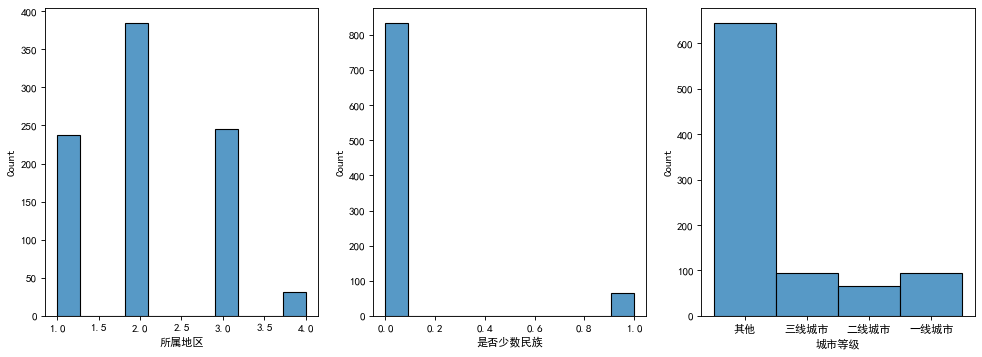

In [210]:
# 处理之后的变量分布图
plt.figure(dpi=80, figsize=(15, 5))
plt.subplot(1, 3, 1)
PCL_0 = sns.histplot(kde=False,data=data['所属地区'])
PCL_0.set_xlabel("所属地区")  # 0-72
plt.subplot(1, 3, 2)
PCL_3 = sns.histplot(kde=False,data=data['是否少数民族'])
PCL_3.set_xlabel("是否少数民族")  # 0-72
plt.subplot(1, 3, 3)
city_num = sns.histplot(kde=False,data=data['城市等级'])
city_num.set_xlabel("城市等级")  # 0-72

In [211]:
data.columns

Index(['序号', '年龄', '性别', '民族', '身高', '体重', '文化程度', '婚姻状况', '家庭人均月收入',
       '近期是否出现意外事件', '是否有家庭成员或亲近朋友意外', '意外事件中是否目睹有人重伤',
       '意外事件及救援过程中，您是否接触或见过尸体', '您是否曾因为灾难现场的景象', '既往是否有精神病史', '近一月内是否使用药物',
       '是否吸烟（包括以前）', '吸烟状态', '是否饮酒', 'ASD分离', 'ASD再体验', 'ASD回避', 'ASD警觉',
       'ASD总分', 'ASD性质', 'PCL总分', '心理韧性', 'BMI', '遗传史', 'PCL_0', 'PCL_3', '省份',
       '城市', '省份N', '是否少数民族', '所属地区', '城市等级', '城市等级数', '是否东部', '是否中部', '是否西部',
       '是否东北', '是否一线城市', '是否二线城市', '是否三线城市', '非一二三城市'],
      dtype='object')

### 2.4 离散变量频数统计分析

In [199]:
l = list(data.columns)
n = len(l)
with open('离散变量频数统计.xlsx', 'w') as f:
    for i in range(len(l) - 1, -1, -1):
        if l[i] in ['性别', '文化程度', '婚姻状况', '家庭人均月收入', '近期是否出现意外事件', '是否有家庭成员或亲近朋友意外', '意外事件中是否目睹有人重伤', 
                    '意外事件及救援过程中，您是否接触或见过尸体', '您是否曾因为灾难现场的景象', '既往是否有精神病史', '近一月内是否使用药物',
                    '是否吸烟（包括以前）', '吸烟状态', '是否饮酒', 'ASD性质','遗传史', 'PCL_0', 'PCL_3', '是否少数民族', '所属地区', '城市等级数']:
            print(data[l[i]].value_counts(), file=f)
            print(data[l[i]].value_counts())

城市等级数
5    646
4     94
2     90
3     65
1      4
Name: count, dtype: int64
所属地区
2    385
3    245
1    237
4     32
Name: count, dtype: int64
是否少数民族
0    835
1     64
Name: count, dtype: int64
PCL_3
0    808
1     91
Name: count, dtype: int64
PCL_0
0    716
1    183
Name: count, dtype: int64
遗传史
1    896
2      3
Name: count, dtype: int64
ASD性质
0    867
1     32
Name: count, dtype: int64
是否饮酒
1    855
2     44
Name: count, dtype: int64
吸烟状态
1    456
3    376
2     67
Name: count, dtype: int64
是否吸烟（包括以前）
1    523
2    376
Name: count, dtype: int64
近一月内是否使用药物
1    894
2      5
Name: count, dtype: int64
既往是否有精神病史
1    898
2      1
Name: count, dtype: int64
您是否曾因为灾难现场的景象
1    825
2     74
Name: count, dtype: int64
意外事件及救援过程中，您是否接触或见过尸体
1    881
2     18
Name: count, dtype: int64
意外事件中是否目睹有人重伤
1    869
2     30
Name: count, dtype: int64
是否有家庭成员或亲近朋友意外
1    876
2     23
Name: count, dtype: int64
近期是否出现意外事件
1    869
2     30
Name: count, dtype: int64
家庭人均月收入
2    321
1    248
3    178
4    

### 2.5 连续变量统计分析

In [200]:
#转变为category类型的数据，之后即可使用describe（）进行描述性统计
# detail['dishes_name'detail['dishes_name']astype('category')
data[['年龄', '身高', '体重', 'ASD分离', 'ASD再体验', 'ASD回避', 'ASD警觉',
       'ASD总分', 'ASD性质', 'PCL总分', '心理韧性', 'BMI']].describe()

,年龄,身高,体重,ASD分离,ASD再体验,ASD回避,ASD警觉,ASD总分,ASD性质,PCL总分,心理韧性,BMI
count,899.000000,899.000000,899.00000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000
mean,24.201335,174.161290,71.09010,5.691880,5.569522,4.530590,5.779755,21.571746,0.035595,1.401557,39.529477,23.441926
std,3.924760,5.336308,12.74557,1.866851,1.766555,1.603139,1.908950,6.477829,0.185382,5.331342,14.754335,4.181665
min,15.000000,158.000000,40.00000,5.000000,5.000000,4.000000,5.000000,19.000000,0.000000,0.000000,10.000000,13.000000
25%,22.000000,170.000000,64.00000,5.000000,5.000000,4.000000,5.000000,19.000000,0.000000,0.000000,36.000000,21.000000
50%,23.000000,175.000000,69.00000,5.000000,5.000000,4.000000,5.000000,19.000000,0.000000,0.000000,48.000000,22.857143
75%,26.000000,178.000000,75.00000,5.000000,5.000000,4.000000,6.000000,21.000000,0.000000,0.000000,50.000000,24.212293
max,56.000000,200.000000,130.00000,21.000000,25.000000,20.000000,25.000000,91.000000,1.000000,72.000000,50.000000,45.351474


连续变量可视化

Text(0.5, 0, 'BMI')

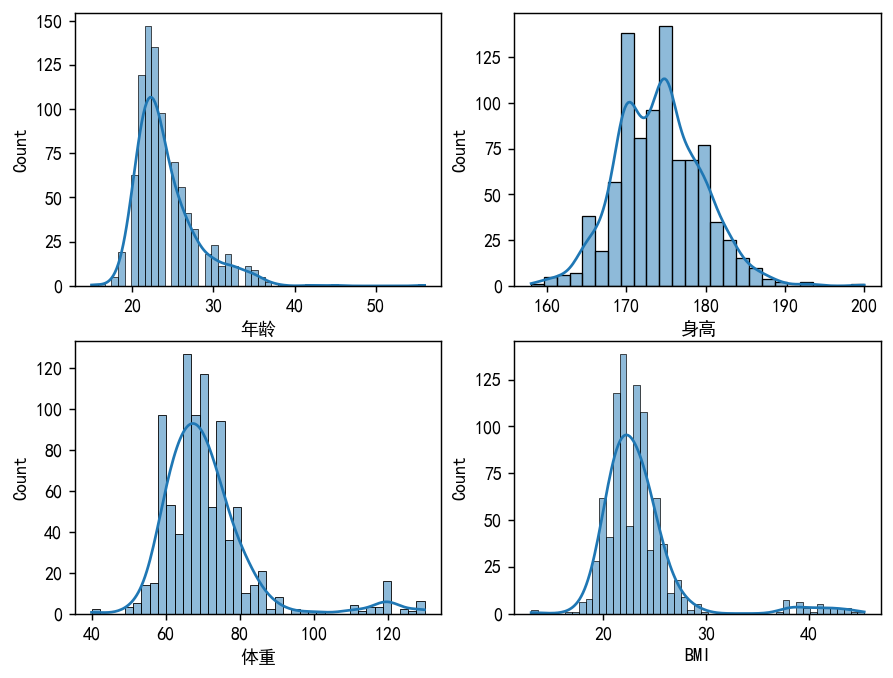

In [201]:
# sns.histplot(kde=True,data=data
plt.figure(dpi=130, figsize=(8, 6))
plt.subplot(2, 2, 1)
age = sns.histplot(kde=True,data=data['年龄'])
age.set_xlabel("年龄")
#扩展：对a1子图添加x轴标题
# 箱线图
plt.subplot(2, 2, 2)
shengao = sns.histplot(kde=True,data=data['身高'])
shengao.set_xlabel("身高")
plt.subplot(2, 2, 3)
tizhong = sns.histplot(kde=True,data=data['体重'])
tizhong.set_xlabel("体重")
plt.subplot(2, 2, 4)
BMI = sns.histplot(kde=True,data=data['BMI'])
BMI.set_xlabel("BMI")
# 结果是要优于箱线图的

Text(0.5, 0, '心理韧性')

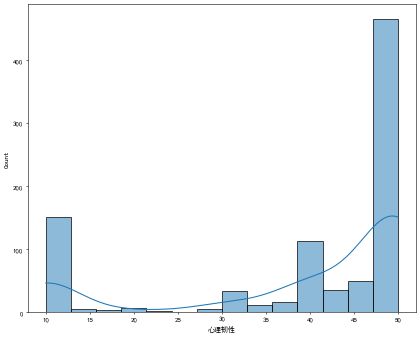

In [202]:
plt.figure(dpi=50, figsize=(10, 8))
BMI = sns.histplot(kde=True,data=data['心理韧性'])
BMI.set_xlabel("心理韧性")

Text(0.5, 0, 'ASD警觉')

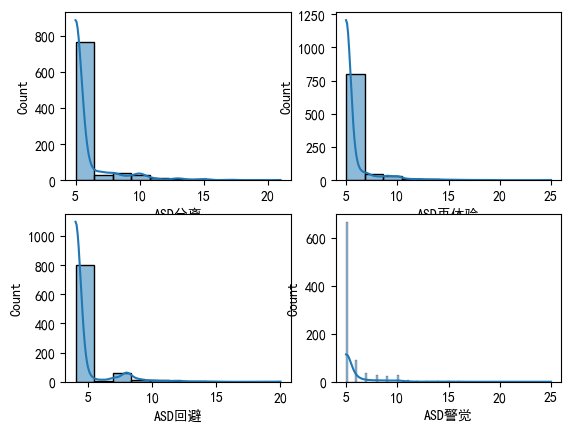

In [203]:
# ASD相关指标可视化
plt.subplot(2, 2, 1)
ASD1 = sns.histplot(kde=True,data=data['ASD分离'])
ASD1.set_xlabel("ASD分离")
#扩展：对a1子图添加x轴标题
# 箱线图
plt.subplot(2, 2, 2)
ASD2 = sns.histplot(kde=True,data=data['ASD再体验'])
ASD2.set_xlabel("ASD再体验")
plt.subplot(2, 2, 3)
ASD3 = sns.histplot(kde=True,data=data['ASD回避'])
ASD3.set_xlabel("ASD回避")
plt.subplot(2, 2, 4)
ASD4 = sns.histplot(kde=True,data=data['ASD警觉'])
ASD4.set_xlabel("ASD警觉")
# 结果是要优于箱线图的

从上面ASD相关指标可视化的图中，感觉可以尝试着使用决策树来进行特征选择，因为它可以自动去做特征划分

Text(0.5, 0, 'ASD总分')

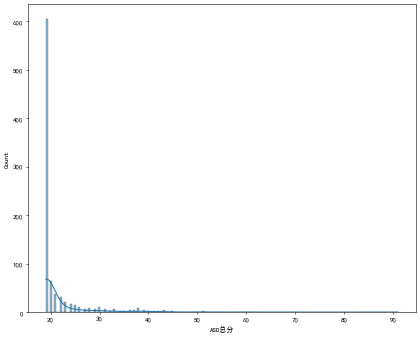

In [204]:
plt.figure(dpi=50, figsize=(10, 8))
ASDall = sns.histplot(kde=True,data=data['ASD总分'])
ASDall.set_xlabel("ASD总分")

In [205]:
data.head()

,序号,年龄,性别,民族,身高,体重,文化程度,婚姻状况,家庭人均月收入,近期是否出现意外事件,...,遗传史,PCL_0,PCL_3,省份,城市,省份N,是否少数民族,所属地区,城市等级,城市等级数
0,A1,23,1,蒙古族,174,72,3,1,1,1,...,1,0,0,内蒙古,兴安盟,1,1,3,其他,5
1,A2,21,1,汉族,170,79,2,1,4,1,...,1,1,1,安徽,铜陵,6,0,2,其他,5
2,A3,23,1,汉族,170,65,1,1,2,2,...,1,0,0,河南,商丘,15,0,2,其他,5
3,A4,32,1,汉族,175,68,2,2,1,1,...,1,1,1,河南,周口,15,0,2,其他,5
4,A5,23,1,汉族,170,60,1,1,1,1,...,1,0,0,安徽,宿州,6,0,2,其他,5


In [206]:
data.columns

Index(['序号', '年龄', '性别', '民族', '身高', '体重', '文化程度', '婚姻状况', '家庭人均月收入',
       '近期是否出现意外事件', '是否有家庭成员或亲近朋友意外', '意外事件中是否目睹有人重伤',
       '意外事件及救援过程中，您是否接触或见过尸体', '您是否曾因为灾难现场的景象', '既往是否有精神病史', '近一月内是否使用药物',
       '是否吸烟（包括以前）', '吸烟状态', '是否饮酒', 'ASD分离', 'ASD再体验', 'ASD回避', 'ASD警觉',
       'ASD总分', 'ASD性质', 'PCL总分', '心理韧性', 'BMI', '遗传史', 'PCL_0', 'PCL_3', '省份',
       '城市', '省份N', '是否少数民族', '所属地区', '城市等级', '城市等级数'],
      dtype='object')

## 03模型分析

### 3.1 speqrman相关性分析

### 剥离数据

In [207]:
# data.to_csv("./处理后的数据/data1.csv", index=False)

In [213]:
data.columns

Index(['序号', '年龄', '性别', '民族', '身高', '体重', '文化程度', '婚姻状况', '家庭人均月收入',
       '近期是否出现意外事件', '是否有家庭成员或亲近朋友意外', '意外事件中是否目睹有人重伤',
       '意外事件及救援过程中，您是否接触或见过尸体', '您是否曾因为灾难现场的景象', '既往是否有精神病史', '近一月内是否使用药物',
       '是否吸烟（包括以前）', '吸烟状态', '是否饮酒', 'ASD分离', 'ASD再体验', 'ASD回避', 'ASD警觉',
       'ASD总分', 'ASD性质', 'PCL总分', '心理韧性', 'BMI', '遗传史', 'PCL_0', 'PCL_3', '省份',
       '城市', '省份N', '是否少数民族', '所属地区', '城市等级', '城市等级数', '是否东部', '是否中部', '是否西部',
       '是否东北', '是否一线城市', '是否二线城市', '是否三线城市', '非一二三城市'],
      dtype='object')

In [217]:
dataN = data.copy(deep = True)
# https://blog.csdn.net/yeshang_lady/article/details/129582248
dataN.drop(['序号', '民族', '省份', '省份N', '城市', '城市等级', "所属地区", '城市等级', '城市等级数', 'PCL总分', 'PCL_0'],  axis = 1, inplace = True)
dataN.columns

Index(['年龄', '性别', '身高', '体重', '文化程度', '婚姻状况', '家庭人均月收入', '近期是否出现意外事件',
       '是否有家庭成员或亲近朋友意外', '意外事件中是否目睹有人重伤', '意外事件及救援过程中，您是否接触或见过尸体',
       '您是否曾因为灾难现场的景象', '既往是否有精神病史', '近一月内是否使用药物', '是否吸烟（包括以前）', '吸烟状态',
       '是否饮酒', 'ASD分离', 'ASD再体验', 'ASD回避', 'ASD警觉', 'ASD总分', 'ASD性质', '心理韧性',
       'BMI', '遗传史', 'PCL_3', '是否少数民族', '是否东部', '是否中部', '是否西部', '是否东北',
       '是否一线城市', '是否二线城市', '是否三线城市', '非一二三城市'],
      dtype='object')

In [ ]:
dataN1 = dataN[['年龄', '性别', '身高', '体重', '文化程度', '婚姻状况', '家庭人均月收入', '近期是否出现意外事件', '是否有家庭成员或亲近朋友意外', '意外事件中是否目睹有人重伤', 
                '意外事件及救援过程中，您是否接触或见过尸体', '您是否曾因为灾难现场的景象', '既往是否有精神病史', '近一月内是否使用药物', '是否吸烟（包括以前）', '吸烟状态', 
                '是否饮酒', 'ASD分离', 'ASD再体验', 'ASD回避', 'ASD警觉', 'ASD总分', 'ASD性质', '心理韧性', 'BMI', '遗传史', '是否少数民族', '是否东部', '是否中部', 
                '是否西部', '是否东北', '是否一线城市', '是否二线城市', '是否三线城市', '非一二三城市', 'PCL_3']]
dataN1.columns = ['年龄', '性别', '身高', '体重', '文化程度', '婚姻状况', '家庭人均月收入', '是否出现意外事件', '是否有家人或朋友意外', '是否目睹有人重伤', 
                '是否接触或见过尸体', '是否感到害怕紧张或无助', '既往是否有精神病史', '近一月内是否使用药物', '是否吸烟（包括以前）', '吸烟状态', 
                '是否饮酒', 'ASD分离', 'ASD再体验', 'ASD回避', 'ASD警觉', 'ASD总分', 'ASD性质', '心理韧性', 'BMI', '遗传史', '是否少数民族', '是否东部', '是否中部', 
                '是否西部', '是否东北', '是否一线城市', '是否二线城市', '是否三线城市', '非一二三城市', 'PCL_3']
dataN1.head(0)

,年龄,性别,身高,体重,文化程度,婚姻状况,家庭人均月收入,是否出现意外事件,是否有家人或朋友意外,是否目睹有人重伤,...,是否少数民族,是否东部,是否中部,是否西部,是否东北,是否一线城市,是否二线城市,是否三线城市,非一二三城市,PCL_3


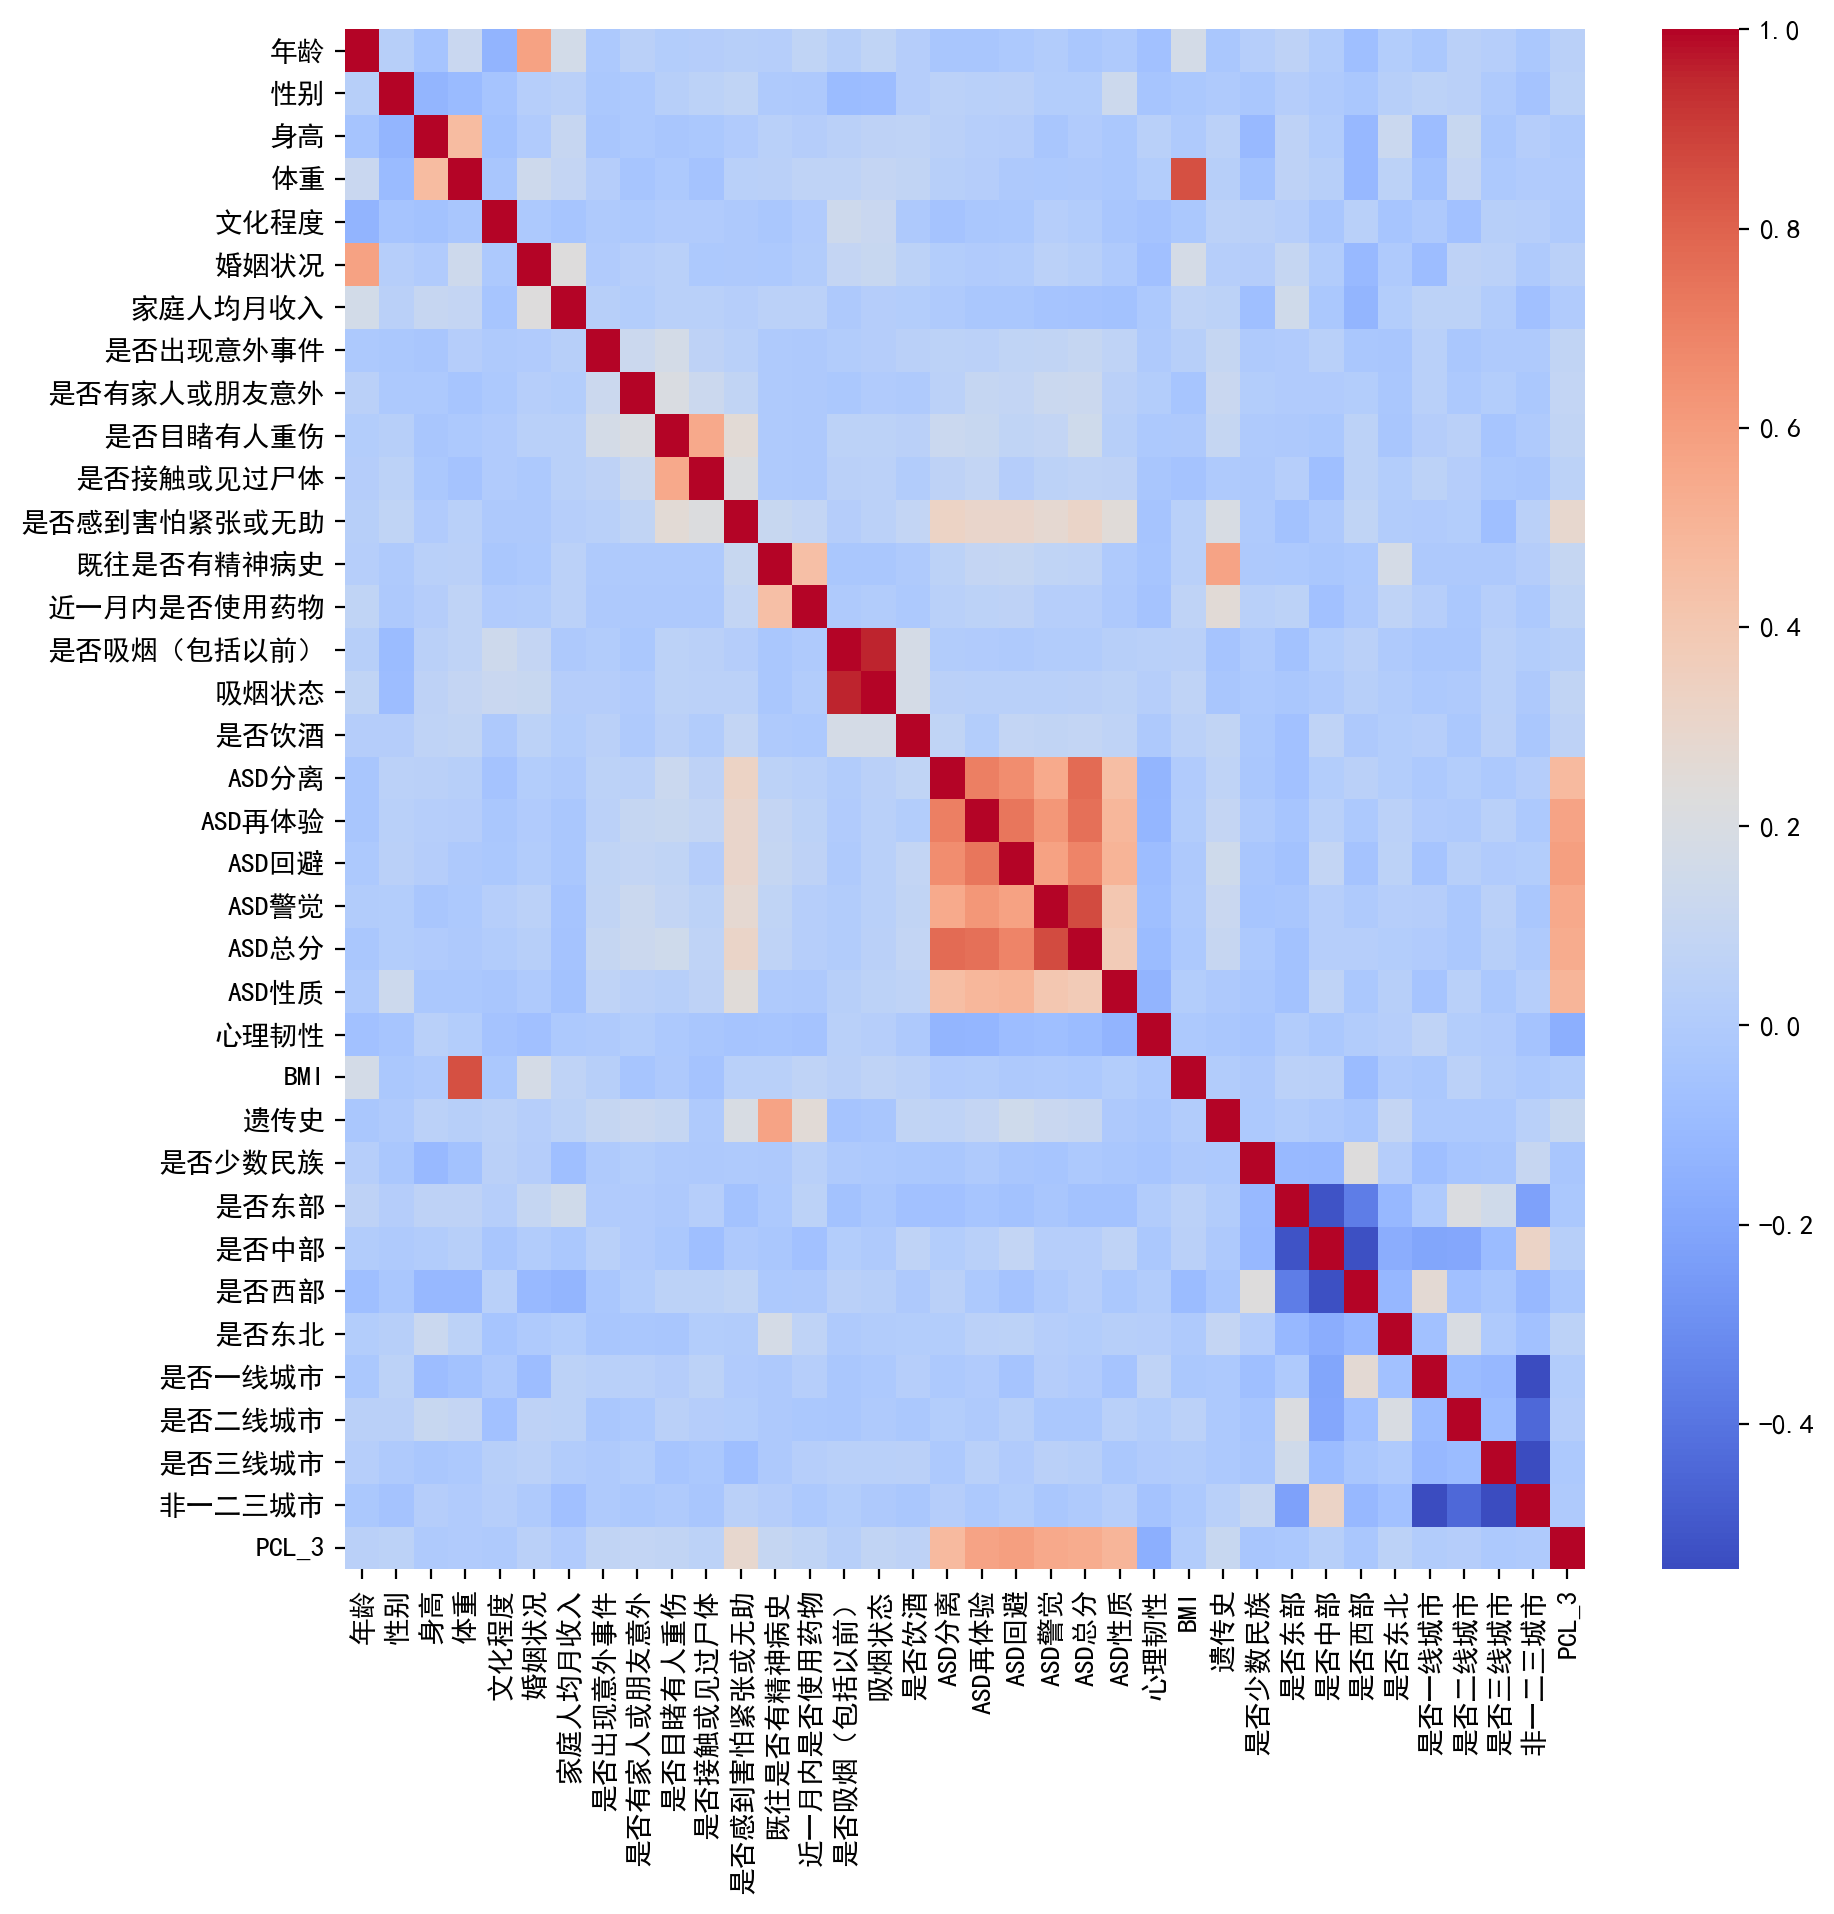

In [ ]:
## speqrman秩相关系数
df = dataN1.corr(method= 'spearman')

# 使用热图可视化 spearman 相关系数
plt.figure(dpi=200, figsize=(10, 10))
sns.heatmap(df, annot=False, cmap='coolwarm')  # fmt=".2f"
plt.savefig(r'output/figure/chapter05/相关系数图.png')
plt.show()

In [223]:
import scipy.stats as stats
def calculate_spearman_correlation(X, Y):
    return stats.spearmanr(X, Y)[0]
def calculate_spearman_correlation_p(X, Y):
    return stats.spearmanr(X, Y)[1]
n = len(dataN.columns)
df_p = pd.DataFrame()
df_v = pd.DataFrame()
col_name = list(dataN.columns)
for i in range(n):
    l_p = []
    l_v = []
    for j in range(n):
        l_p.append(calculate_spearman_correlation_p(dataN[col_name[i]], dataN[col_name[j]]))
        l_v.append(calculate_spearman_correlation(dataN[col_name[i]], dataN[col_name[j]]))
    df_p[col_name[i]] = l_p
    df_v[col_name[i]] = l_v
df_p.index=col_name
df_v.index=col_name

数据输出/数据保存

In [224]:
# 数据输出/数据保存
df.to_csv('./处理后的数据/df.csv')
data.to_csv('./处理后的数据/data_to_R.csv')
df_p.to_csv('./处理后的数据/df_p.csv')
df_v.to_csv('./处理后的数据/df_v.csv')

In [225]:
dataN1.columns

Index(['年龄', '性别', '身高', '体重', '文化程度', '婚姻状况', '家庭人均月收入', '是否出现意外事件',
       '是否有家人或朋友意外', '是否目睹有人重伤', '是否接触或见过尸体', '是否感到害怕紧张或无助', '既往是否有精神病史',
       '近一月内是否使用药物', '是否吸烟（包括以前）', '吸烟状态', '是否饮酒', 'ASD分离', 'ASD再体验', 'ASD回避',
       'ASD警觉', 'ASD总分', 'ASD性质', '心理韧性', 'BMI', '遗传史', '是否少数民族', '是否东部',
       '是否中部', '是否西部', '是否东北', '是否一线城市', '是否二线城市', '是否三线城市', '非一二三城市',
       'PCL_3'],
      dtype='object')

In [ ]:
# 处理完数据不平衡性，接着使用决策树，甚至集成方法去算正向影响和负向影响。
# dummy = pd.get_dummies(data['所属地区'])
# data = pd.concat([data,dummy],axis=1)

In [228]:
dataN1.columns

Index(['年龄', '性别', '身高', '体重', '文化程度', '婚姻状况', '家庭人均月收入', '是否出现意外事件',
       '是否有家人或朋友意外', '是否目睹有人重伤', '是否接触或见过尸体', '是否感到害怕紧张或无助', '既往是否有精神病史',
       '近一月内是否使用药物', '是否吸烟（包括以前）', '吸烟状态', '是否饮酒', 'ASD分离', 'ASD再体验', 'ASD回避',
       'ASD警觉', 'ASD总分', 'ASD性质', '心理韧性', 'BMI', '遗传史', '是否少数民族', '是否东部',
       '是否中部', '是否西部', '是否东北', '是否一线城市', '是否二线城市', '是否三线城市', '非一二三城市',
       'PCL_3'],
      dtype='object')

## 04 逻辑回归

### 4.1 数据标准化和数据切分

逻辑回归数据不需要标准化，但是考虑到对变量的绝对值进行了正则化约束、惩罚，我们还是对数据进行标准化处理。

In [ ]:
import sklearn
from sklearn.preprocessing import StandardScaler

## 提取自变量和因变量
X = dataN1.drop('PCL_3', axis=1)
y = dataN1['PCL_3']
# 指定需要标准化的列
columns_to_scale = ['年龄', '身高', '体重', 'BMI']

## 初始化
scaler = StandardScaler()
# 对指定列进行标准化
X[columns_to_scale] = scaler.fit_transform(X[columns_to_scale])

## 划分训练集和测试集
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

### 4.2 不平衡数据 SMOTE 过采样

In [ ]:
## 不平衡数据 SMOTE 过采样
from imblearn.over_sampling import SMOTE
# 初始化 SMOTE 对象
smote = SMOTE(random_state=42)

# 使用 SMOTE 进行过采样
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# 将过采样后的数据重新组合为 DataFrame
df_resampled = pd.DataFrame(X_resampled, columns=X_train.columns)
# df_resampled['target'] = y_resampled

print("过采样后的数据：")
print(df_resampled)

过采样后的数据：
            年龄  性别        身高        体重  文化程度  婚姻状况  家庭人均月收入  是否出现意外事件  \
0    -0.051327   1  0.719757 -0.399585     1     1        3         2   
1     0.203607   1  0.157258 -0.164078     1     1        3         1   
2     0.458542   1 -0.217742 -0.478087     1     1        4         1   
3    -0.561196   1  0.344758  0.306936     2     1        3         2   
4    -0.561196   1  1.657256  0.699448     2     1        1         1   
...        ...  ..       ...       ...   ...   ...      ...       ...   
1297  2.550676   1 -1.355602 -0.951793     1     1        3         1   
1298 -0.600826   1  0.561404 -0.090858     1     1        2         1   
1299  0.122258   1 -0.481085 -0.387942     2     1        3         1   
1300 -0.517581   1  0.468101 -0.190939     1     1        2         1   
1301  1.969280   1  1.046184 -0.207718     1     2        4         1   

      是否有家人或朋友意外  是否目睹有人重伤  ...  遗传史  是否少数民族  是否东部  是否中部  是否西部  是否东北  是否一线城市  \
0              1         2  ...   

### 4.3 交叉验证 + logistic + L1惩罚/lasso

In [290]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# 定义参数候选列表
param_grid = {
    'C': [0.1, 0.2, 0.3, 0.4, 0.5],  # 正则化强度
    'penalty': ['l1'],  # 正则化类型
    'solver': ['liblinear']  # 优化算法
}

# 创建 GridSearchCV 实例
grid_search = GridSearchCV(LogisticRegression(random_state=123), param_grid, cv=10, n_jobs=-1)

# 拟合数据并找到最佳参数
grid_search.fit(X_resampled, y_resampled)

# 打印最佳参数
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

Best parameters: {'C': 0.5, 'penalty': 'l1', 'solver': 'liblinear'}
Best cross-validation score: 0.9340516735173223


In [291]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# 构建逻辑回归模型
logitmodel = LogisticRegression(C=0.5, penalty='l1', solver='liblinear', random_state=123)

# 模型训练
logitmodel.fit(X_resampled, y_resampled)

# 模型评估
y_pred = logitmodel.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

# 输出模型评估结果
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion)

Accuracy: 0.9444444444444444
Confusion Matrix:
 [[152   5]
 [  5  18]]


In [292]:
from sklearn import metrics
print('Accuracy',metrics.accuracy_score(y_test, y_pred))
print('Precision',metrics.precision_score(y_test, y_pred))
print('Recall',metrics.recall_score(y_test, y_pred))
print('F1-score:',metrics.f1_score(y_test, y_pred))
# 打印AUC值
y_pred_proba = logitmodel.predict_proba(X_test)[:,1]
print('AUC:',metrics.roc_auc_score(y_test, y_pred_proba))

#输出系数
coefficients = logitmodel.coef_
intercept = logitmodel.intercept_
print('系数：', coefficients)
print('截距：', intercept)

Accuracy 0.9444444444444444
Precision 0.782608695652174
Recall 0.782608695652174
F1-score: 0.782608695652174
AUC: 0.8908889504292438
系数： [[ 5.55610853e-01  0.00000000e+00  0.00000000e+00  2.78562284e-02
   0.00000000e+00 -1.09823311e+00 -4.37839135e-01  0.00000000e+00
   0.00000000e+00  0.00000000e+00 -3.80707563e-01  1.36969076e-01
   0.00000000e+00  0.00000000e+00 -1.17880052e+00  4.58565830e-01
  -9.74053054e-01 -8.46548921e-01 -6.90542702e-01 -6.76398934e-01
  -2.48150557e-01  9.29314316e-01  0.00000000e+00 -1.92874767e-03
   0.00000000e+00  0.00000000e+00 -2.64138848e-01 -3.23410577e+00
  -2.96144233e+00 -3.78803979e+00 -2.86441438e+00 -1.05915557e+00
  -1.46365954e+00 -1.64758046e+00 -1.37056013e+00]]
截距： [0.]


In [ ]:
# 比较发现，还是lambda为1/6最好，选择其建模，计算混淆矩阵等

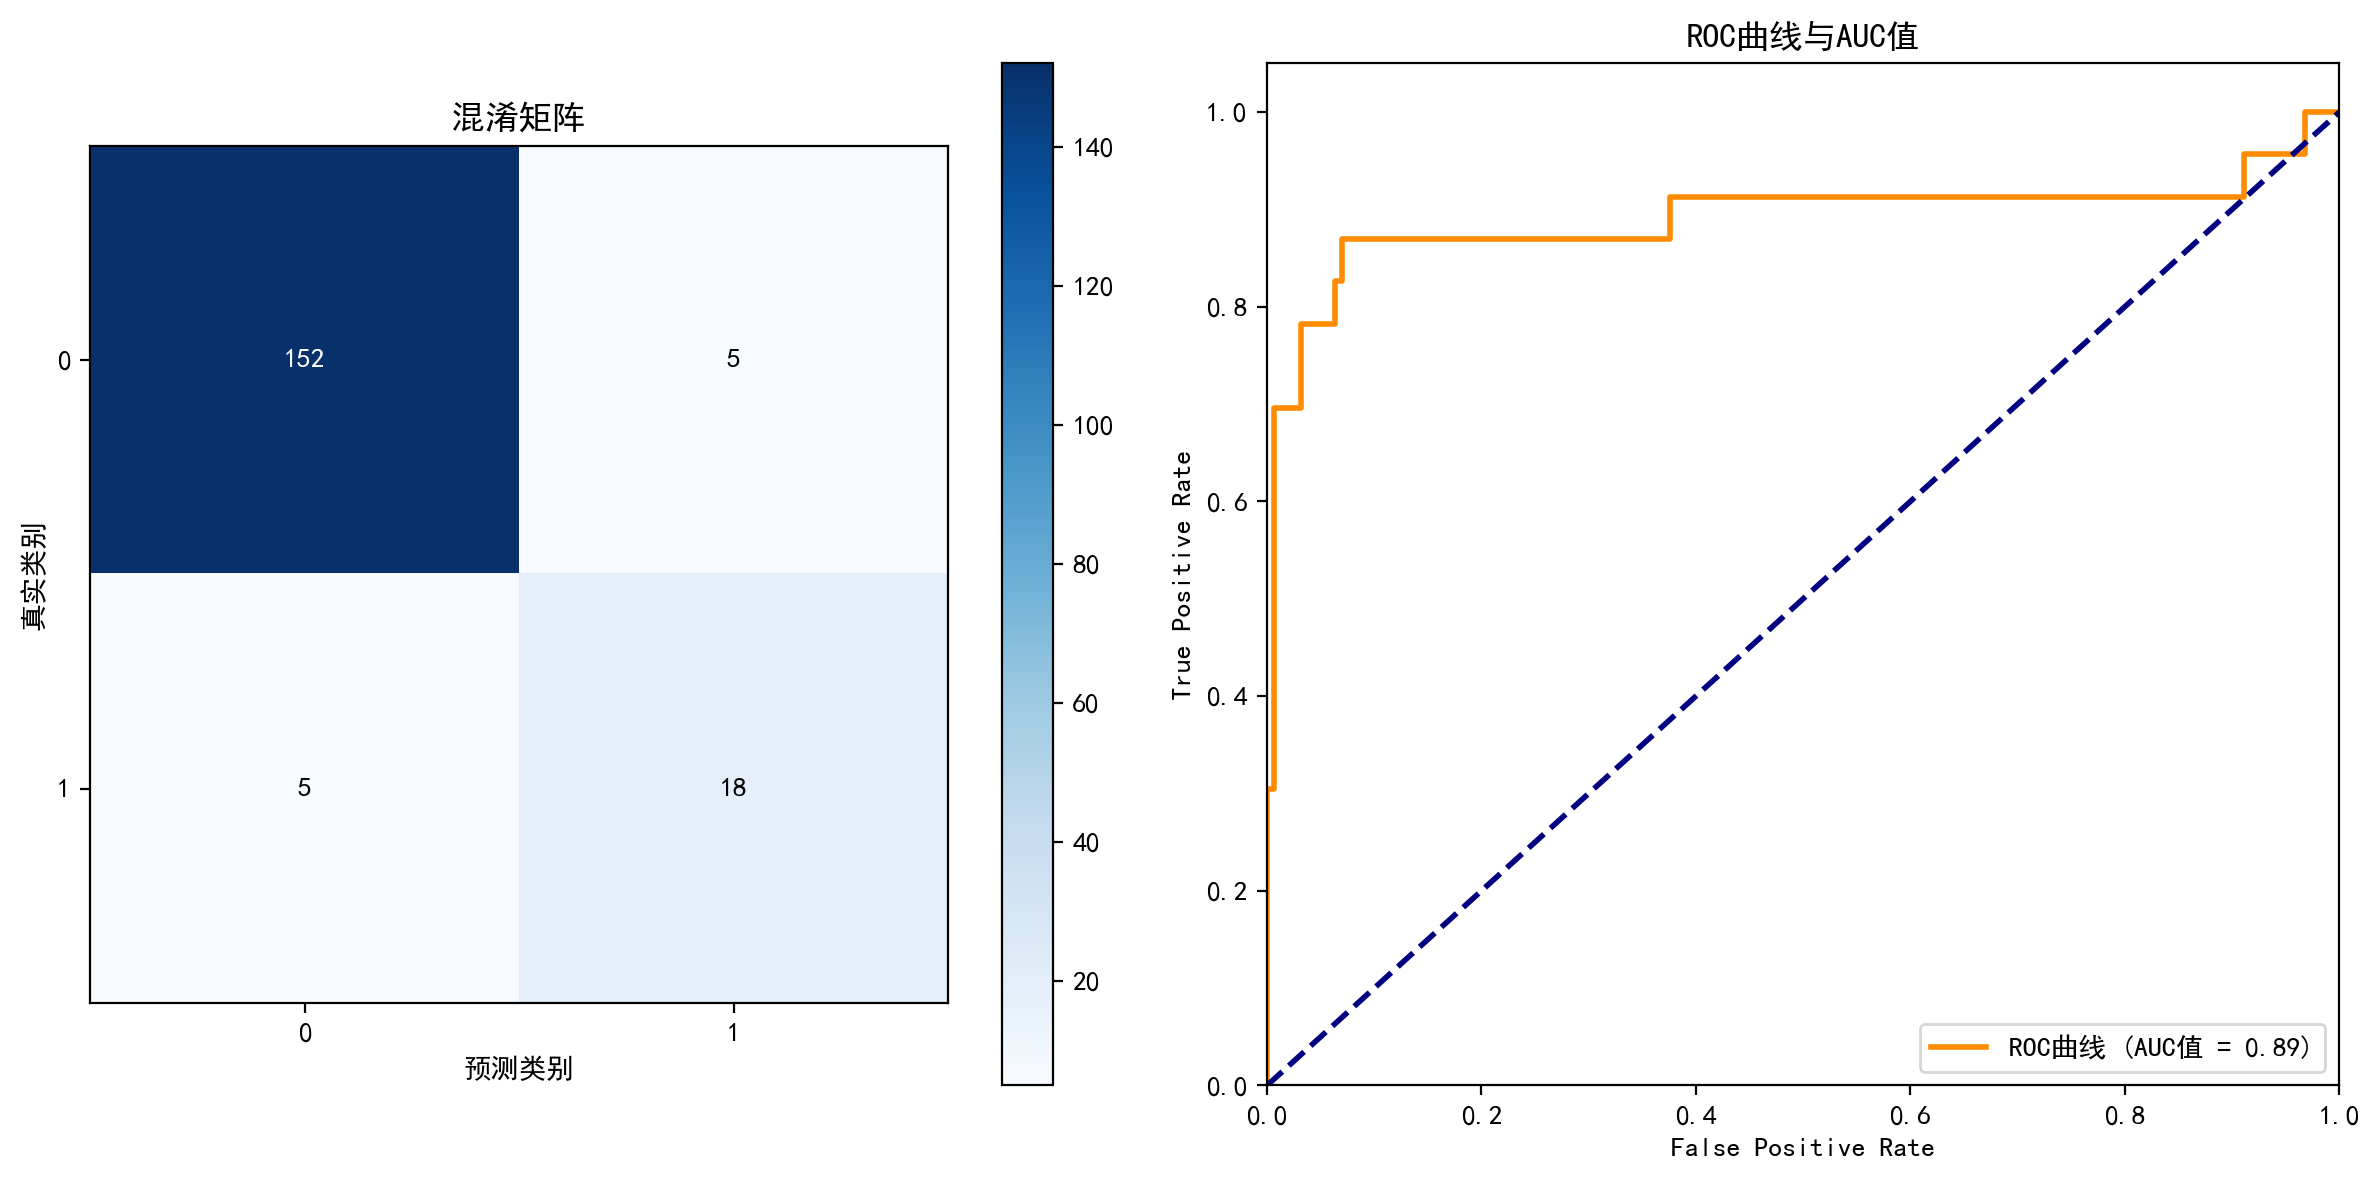

In [293]:
from sklearn.metrics import confusion_matrix, roc_curve, auc

# 预测结果
y_pred = logitmodel.predict(X_test)
y_score = logitmodel.predict_proba(X_test)[:, 1]  # 获取预测概率

# 计算混淆矩阵
cm = confusion_matrix(y_test, y_pred)

# 计算 ROC 曲线和 AUC
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

# 创建画布和子图
fig, ax = plt.subplots(1, 2, figsize=(12, 6), dpi=200)

# 绘制混淆矩阵
im = ax[0].imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
fig.colorbar(im, ax=ax[0])
ax[0].set(xticks=np.arange(cm.shape[1]),
          yticks=np.arange(cm.shape[0]),
          ylabel='真实类别',
          xlabel='预测类别')
ax[0].set_title('混淆矩阵')

# 在矩阵图中显示数字标签
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax[0].text(j, i, format(cm[i, j], 'd'), ha="center", va="center",
                   color="white" if cm[i, j] > thresh else "black")

# 绘制 ROC 曲线
ax[1].plot(fpr, tpr, color='darkorange', lw=2, label='ROC曲线 (AUC值 = %0.2f)' % roc_auc)
ax[1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
ax[1].set_xlim([0.0, 1.0])
ax[1].set_ylim([0.0, 1.05])
ax[1].set_xlabel('False Positive Rate')
ax[1].set_ylabel('True Positive Rate')
ax[1].set_title('ROC曲线与AUC值')
ax[1].legend(loc="lower right")

# 调整布局并显示
plt.tight_layout()
plt.show()